# using diabetes dataset

In [2]:
dataset = csvread('diabetes.csv');

In [3]:
X = dataset(2:end, 3);
y = dataset(2:end, end);

## test split 80:20

In [4]:
X_train = X(1:422);
y_train = y(1:422);

X_test = X(423:end);
y_test = y(423:end);

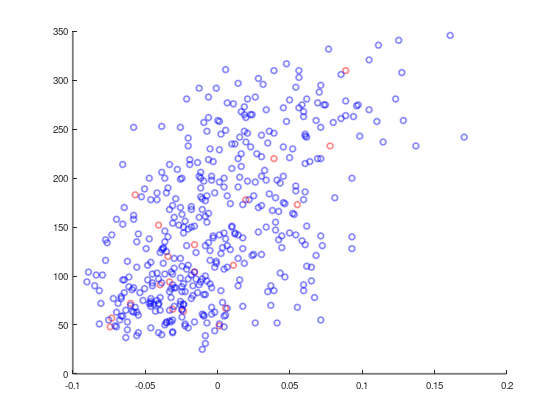

In [10]:
scatter(X_test, y_test, 'r')
hold on;
scatter(X_train, y_train, 'b')

## finding coefficient without intercept

In [11]:
b = X_train\y_train
y_pred =  X_test*b

b = 970.17
y_pred =

   75.5405
  -38.4362
   10.7097
  -39.4819
  -33.2079
    5.4814
   85.9971
  -32.1623
  -55.1667
  -30.0709
   53.5817
  -58.3037
    1.2988
  -22.7513
  -71.8973
   19.0750
  -15.4317
  -15.4317
   37.8968
  -70.8516



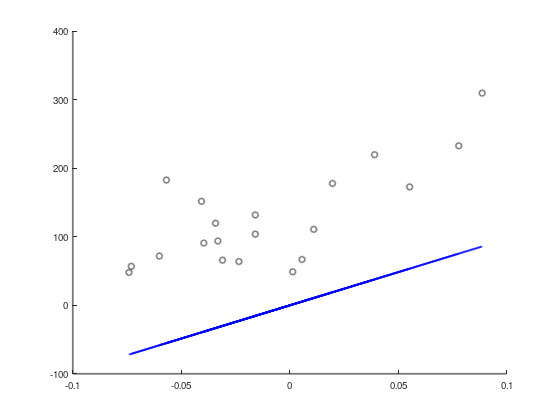

In [12]:
scatter(X_test, y_test, 'k');
hold on;
plot(X_test, y_pred, 'b', 'LineWidth', 3);

In [38]:
mse = mean((y_test - y_pred).^2);
disp(['Mean Squared Error (MSE): ' num2str(mse)]);

Mean Squared Error (MSE): 20687.814


## finding slope and intercept both

In [39]:
X_with_ones = [ones(length(X), 1), X];

In [40]:
X_train_with_ones = X_with_ones(1:422, :);
y_train = y(1:422);

X_test_with_ones = X_with_ones(423:end, :);
y_test = y(423:end);

In [41]:
b_with_intercept = X_train_with_ones \ y_train

b_with_intercept =

   152.92
   938.24



In [42]:
y_pred_with_intercept = X_test_with_ones * b_with_intercept;

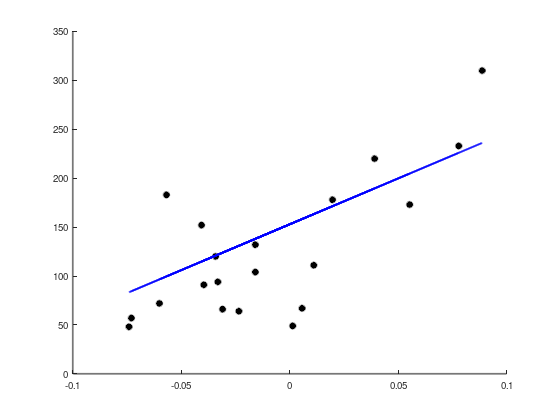

In [43]:
scatter(X_test, y_test, 'k', 'fill');
hold on;
plot(X_test, y_pred_with_intercept, 'b', 'LineWidth', 3);

In [44]:
mse = mean((y_test - y_pred_with_intercept).^2);
disp(['Mean Squared Error (MSE): ' num2str(mse)]);

Mean Squared Error (MSE): 2548.0724


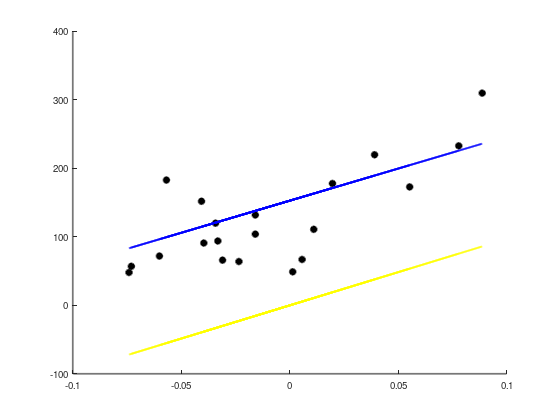

In [45]:
scatter(X_test, y_test, 'k');
hold on;
plot(X_test, y_pred, 'y', 'LineWidth', 3);
hold on;
scatter(X_test, y_test, 'k', 'fill');
hold on;
plot(X_test, y_pred_with_intercept, 'b', 'LineWidth', 3);

## to find which one is a better fit, we find R2 score

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$


In [54]:
R2_with_intercept = 1 - sum((y_test - y_pred_with_intercept).^2)/ sum((y_test - mean(y_test)).^2)

R2_with_intercept = 0.4726


In [55]:
R2_without_intercept  = 1 - sum((y_test - y_pred).^2)/ sum((y_test - mean(y_test)).^2)

R2_without_intercept = -3.2822


In [48]:
residuals = y_test - y_pred;
SSresid = sum(residuals.^2);

SStotal = (length(y) - 1) * var(y);

rsq = 1 - SSresid / SStotal;
disp(['R-squared (rsq): ' num2str(rsq)]);

R-squared (rsq): 0.84214
